In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ardl import ARDL
import statsmodels


from sklearn.metrics import mean_squared_error
from math import sqrt
import math

import pmdarima

In [2]:
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Read Data

In [4]:
file = "../Codes/df_spot_rates.csv"
df_ecb = pd.read_csv(file)
df_ecb['TIME_PERIOD'] = pd.to_datetime(df_ecb['TIME_PERIOD'])

In [5]:
df_ecb

,TIME_PERIOD,MAT,OBS_VALUE
0,2004-09-06,3,2.034172
1,2004-09-06,4,2.063283
2,2004-09-06,5,2.092544
3,2004-09-06,6,2.121920
4,2004-09-06,7,2.151377
...,...,...,...
1783335,2023-12-29,356,2.351581
1783336,2023-12-29,357,2.350594
1783337,2023-12-29,358,2.349600
1783338,2023-12-29,359,2.348600


In [6]:
file = "../data/jgbcme_all.csv"

df = pd.read_csv(file, header=1)
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df_orig = df.copy()

In [8]:
df

,Date,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,25Y,30Y,40Y
0,1974-09-24,10.327,9.362,8.83,8.515,8.348,8.290,8.240,8.121,8.127,-,-,-,-,-,-
1,1974-09-25,10.333,9.364,8.831,8.516,8.348,8.290,8.240,8.121,8.127,-,-,-,-,-,-
2,1974-09-26,10.34,9.366,8.832,8.516,8.348,8.290,8.240,8.122,8.128,-,-,-,-,-,-
3,1974-09-27,10.347,9.367,8.833,8.517,8.349,8.290,8.240,8.122,8.128,-,-,-,-,-,-
4,1974-09-28,10.354,9.369,8.834,8.518,8.349,8.291,8.240,8.122,8.129,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12840,2024-10-25,0.311,0.449,0.453,0.515,0.580,0.593,0.651,0.731,0.832,0.955,1.447,1.789,2.028,2.159,2.428
12841,2024-10-28,0.315,0.461,0.462,0.525,0.595,0.608,0.671,0.750,0.856,0.981,1.469,1.816,2.054,2.196,2.469
12842,2024-10-29,0.306,0.453,0.459,0.522,0.599,0.608,0.671,0.751,0.858,0.981,1.473,1.812,2.051,2.188,2.473
12843,2024-10-30,0.298,0.443,0.448,0.513,0.585,0.596,0.658,0.735,0.838,0.961,1.462,1.807,2.054,2.201,2.492


In [9]:
df['Date']

0       1974-09-24
1       1974-09-25
2       1974-09-26
3       1974-09-27
4       1974-09-28
           ...    
12840   2024-10-25
12841   2024-10-28
12842   2024-10-29
12843   2024-10-30
12844   2024-10-31
Name: Date, Length: 12845, dtype: datetime64[ns]

In [10]:
df = df.replace("-", np.NaN)

In [11]:
df = df.dropna()

In [12]:
df

,Date,1Y,2Y,3Y,4Y,5Y,6Y,7Y,8Y,9Y,10Y,15Y,20Y,25Y,30Y,40Y
8689,2007-11-06,0.655,0.771,0.849,0.995,1.102,1.181,1.249,1.352,1.477,1.583,1.916,2.133,2.281,2.378,2.439
8690,2007-11-07,0.655,0.771,0.845,0.987,1.091,1.170,1.234,1.338,1.467,1.58,1.916,2.133,2.285,2.383,2.442
8691,2007-11-08,0.653,0.766,0.838,0.972,1.075,1.147,1.207,1.312,1.444,1.556,1.904,2.12,2.277,2.374,2.435
8692,2007-11-09,0.653,0.766,0.833,0.967,1.071,1.138,1.195,1.300,1.435,1.547,1.894,2.112,2.271,2.368,2.429
8693,2007-11-12,0.656,0.767,0.83,0.963,1.068,1.139,1.195,1.292,1.421,1.534,1.88,2.094,2.257,2.352,2.414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12840,2024-10-25,0.311,0.449,0.453,0.515,0.580,0.593,0.651,0.731,0.832,0.955,1.447,1.789,2.028,2.159,2.428
12841,2024-10-28,0.315,0.461,0.462,0.525,0.595,0.608,0.671,0.750,0.856,0.981,1.469,1.816,2.054,2.196,2.469
12842,2024-10-29,0.306,0.453,0.459,0.522,0.599,0.608,0.671,0.751,0.858,0.981,1.473,1.812,2.051,2.188,2.473
12843,2024-10-30,0.298,0.443,0.448,0.513,0.585,0.596,0.658,0.735,0.838,0.961,1.462,1.807,2.054,2.201,2.492


In [13]:
# Check if all dates are present
ls = df['Date']
for idx, ele in enumerate(ls):
    if idx == 0:
        continue

    prev_date = ls.iloc[idx - 1]

    if (ele.month - prev_date.month) != 1:
        if ele.month == 1 and prev_date.month == 12 and (ele.year - prev_date.year) == 1:
            continue
        print(f"{idx}: {ele} {prev_date}")

1: 2007-11-07 00:00:00 2007-11-06 00:00:00
2: 2007-11-08 00:00:00 2007-11-07 00:00:00
3: 2007-11-09 00:00:00 2007-11-08 00:00:00
4: 2007-11-12 00:00:00 2007-11-09 00:00:00
5: 2007-11-13 00:00:00 2007-11-12 00:00:00
6: 2007-11-14 00:00:00 2007-11-13 00:00:00
7: 2007-11-15 00:00:00 2007-11-14 00:00:00
8: 2007-11-16 00:00:00 2007-11-15 00:00:00
9: 2007-11-19 00:00:00 2007-11-16 00:00:00
10: 2007-11-20 00:00:00 2007-11-19 00:00:00
11: 2007-11-21 00:00:00 2007-11-20 00:00:00
12: 2007-11-22 00:00:00 2007-11-21 00:00:00
13: 2007-11-26 00:00:00 2007-11-22 00:00:00
14: 2007-11-27 00:00:00 2007-11-26 00:00:00
15: 2007-11-28 00:00:00 2007-11-27 00:00:00
16: 2007-11-29 00:00:00 2007-11-28 00:00:00
17: 2007-11-30 00:00:00 2007-11-29 00:00:00
19: 2007-12-04 00:00:00 2007-12-03 00:00:00
20: 2007-12-05 00:00:00 2007-12-04 00:00:00
21: 2007-12-06 00:00:00 2007-12-05 00:00:00
22: 2007-12-07 00:00:00 2007-12-06 00:00:00
23: 2007-12-10 00:00:00 2007-12-07 00:00:00
24: 2007-12-11 00:00:00 2007-12-10 00:00:

In [14]:
# Check if all dates are present
ls = df_orig.iloc[8692:]['Date']
checker = set(df['Date'])
for idx, ele in enumerate(ls):
    # date = ls.iloc[idx]
    if ele not in checker:
        print(f"{idx}: {ele} ")    

    # if idx == 0:
    #     continue

    # prev_date = ls.iloc[idx - 1]

    # if (ele.month - prev_date.month) != 1:
    #     if ele.month == 1 and prev_date.month == 12 and (ele.year - prev_date.year) == 1:
    #         continue
    #     print(f"{idx}: {ele} {prev_date}")

## Data Transformation

In [15]:
df_trans = df.copy()

In [16]:
df_trans = df_trans.rename(columns={"Date": "TIME_PERIOD"})

In [17]:
df_trans = df_trans.melt(id_vars=['TIME_PERIOD'], value_vars=['1Y','2Y','3Y','4Y','5Y','6Y','7Y','8Y','9Y','10Y','15Y','20Y','25Y','30Y','40Y'],
              var_name='MAT', value_name='OBS_VALUE'
              )

In [18]:
di = {
    '1Y':12,'2Y':24,'3Y':36,'4Y':48,'5Y':60,
    '6Y':72,'7Y':84,'8Y':96,'9Y':108,'10Y':120,
    '15Y':180,'20Y':240,'25Y':300,'30Y':360,'40Y':480
}

In [19]:
df_trans['MAT'] = df_trans['MAT'].replace(di)

In [20]:
df_trans = df_trans.sort_values(by=['TIME_PERIOD', "MAT"])

In [21]:
df_trans

,TIME_PERIOD,MAT,OBS_VALUE
0,2007-11-06,12,0.655
4156,2007-11-06,24,0.771
8312,2007-11-06,36,0.849
12468,2007-11-06,48,0.995
16624,2007-11-06,60,1.102
...,...,...,...
45715,2024-10-31,180,1.437
49871,2024-10-31,240,1.786
54027,2024-10-31,300,2.03
58183,2024-10-31,360,2.189


In [23]:
# # Save csv
# df_trans.to_csv("../Data/df_japan_spot_rates.csv", index=False)

# Read Transformed Data

In [8]:
df = pd.read_csv("../data/df_japan_spot_rates.csv")

<Axes: xlabel='Date', ylabel='1Y'>

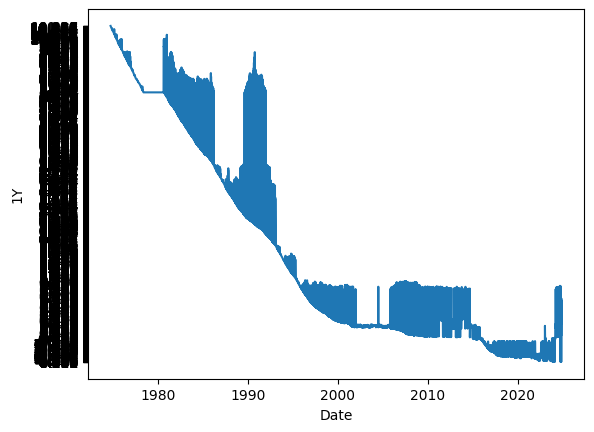

In [9]:
sns.lineplot(data=df_orig, y='1Y', x='Date')

# Data Transformation